# Overcoming a Theoretical Limitation of Self-Attention 

Replication of experiments on FIRST language learning from [Overcoming a Theoretical Limitation of Self-Attention  (Chiang and Cholak, 2022)](https://arxiv.org/pdf/2202.12172.pdf).

In [1]:
from src.transformer import OneTransformer
import torch

## Learning FIRST

Define training parameters as in the original paper. Citing from (David Chiang and Peter Cholak, 2020):
> We used `d_model` = 16 for word encodings, self-attention, and FFNN outputs, and `d_FFNN` = 64 for FFNN hidden layers. We used layer normalization (ε = 10^−5) after residual connections. We used PyTorch’s default initialization and trained using Adam (Kingma and Ba, 2015) with learning rate 3 × 10^−4 (Karpathy, 2016). We did not use dropout, as it did not seem to help.

In [2]:
vocab = ["0", "1", "$"]

epochs = 30
layers = 2
heads = 1 
d_model = 16
d_ffnn = 64  
eps = 1e-5 # value added to denominator in layer normalization
scaled = False

### Generalization experiment

Initialize the Transformer to learn FIRST.

In [3]:
transformer = OneTransformer(len(vocab), layers, heads, d_model, d_ffnn, scaled, eps)
optim = torch.optim.Adam(transformer.parameters(), lr=0.0003)

Define model trainer and train the transformer.

In [4]:
from src.trainer import Trainer
from src.dataset import Dataset

trainset = Dataset(0, 100, 100, random_seed=42, train=True, data_type='one', variable_lenght=False)
testset = Dataset(0, 100, 10,  random_seed=42,  train=False, data_type='one', variable_lenght=False)

trainer = Trainer(0, transformer, optim, vocab, epochs, trainset, testset, verbose=1)
train_l, val_l, train_acc, val_acc = trainer.train()

[Epoch 1] Train acc: 0.66 Train loss: 64.2118452489376, Test acc: 0.74 Test loss: 58.5641225874424
[Epoch 2] Train acc: 0.66 Train loss: 64.88149955868721, Test acc: 0.66 Test loss: 65.06826198101044
[Epoch 3] Train acc: 0.73 Train loss: 58.83504754304886, Test acc: 0.67 Test loss: 64.35054612159729
[Epoch 4] Train acc: 0.62 Train loss: 68.56305000185966, Test acc: 0.78 Test loss: 60.03744241595268
[Epoch 5] Train acc: 0.68 Train loss: 63.74231797456741, Test acc: 0.61 Test loss: 67.67716526985168
[Epoch 6] Train acc: 0.66 Train loss: 64.98323646187782, Test acc: 0.64 Test loss: 65.6452534198761
[Epoch 7] Train acc: 0.66 Train loss: 64.66060608625412, Test acc: 0.67 Test loss: 63.6504203081131
[Epoch 8] Train acc: 0.63 Train loss: 66.44975700974464, Test acc: 0.58 Test loss: 69.12327587604523
[Epoch 9] Train acc: 0.72 Train loss: 59.49192416667938, Test acc: 0.68 Test loss: 64.29363280534744
[Epoch 10] Train acc: 0.74 Train loss: 57.98029068112373, Test acc: 0.61 Test loss: 76.71189641

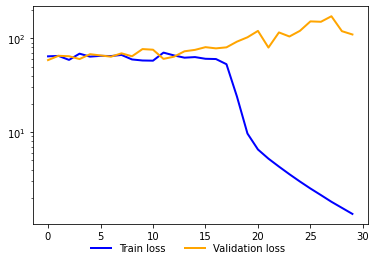

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure()
plt.plot(range(epochs), train_l, color='blue', lw=2, label="Train loss")
plt.plot(range(epochs), val_l, color='orange', lw=2, label="Validation loss")
plt.yscale('log')
ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, frameon=False, loc='lower center',  ncol=4)
plt.show()

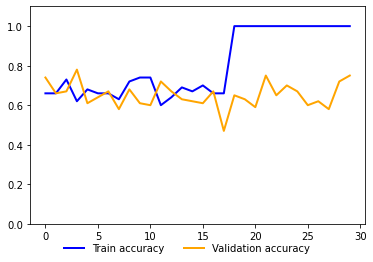

In [6]:
fig = plt.figure()
plt.plot(range(epochs), train_acc, color='blue', lw=2, label="Train accuracy")
plt.plot(range(epochs), val_acc, color='orange', lw=2, label="Validation accuracy")
plt.ylim([0, 1.1])

ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, frameon=False, loc='lower center',  ncol=4)
plt.show()